In [1]:
import quantum_simulation_recipe as qsr
from quantum_simulation_recipe import spin_ham

H = spin_ham.Nearest_Neighbour_1d(4)
H.ham

SparsePauliOp(['IIXX', 'IXXI', 'XXII', 'IIYY', 'IYYI', 'YYII', 'IIZZ', 'IZZI', 'ZZII', 'IIIX', 'IIXI', 'IXII', 'XIII'],
              coeffs=[1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j,
 1. +0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j])

In [2]:
from spin_ham import *
from utils import *
from trotter import *

t_list:  [  10   10   11   12   12   13   14   15   16   17   18   19   21   22
   23   25   27   28   30   32   34   36   39   41   44   47   50   53
   57   60   64   68   73   77   82   88   93  100  106  113  120  128
  136  145  154  164  175  186  198  211  224  238  254  270  288  306
  326  347  369  393  418  445  473  504  536  571  607  646  688  732
  779  829  882  939 1000]


a_em: 2.8518138951148777; b_em: -20.816110546421523


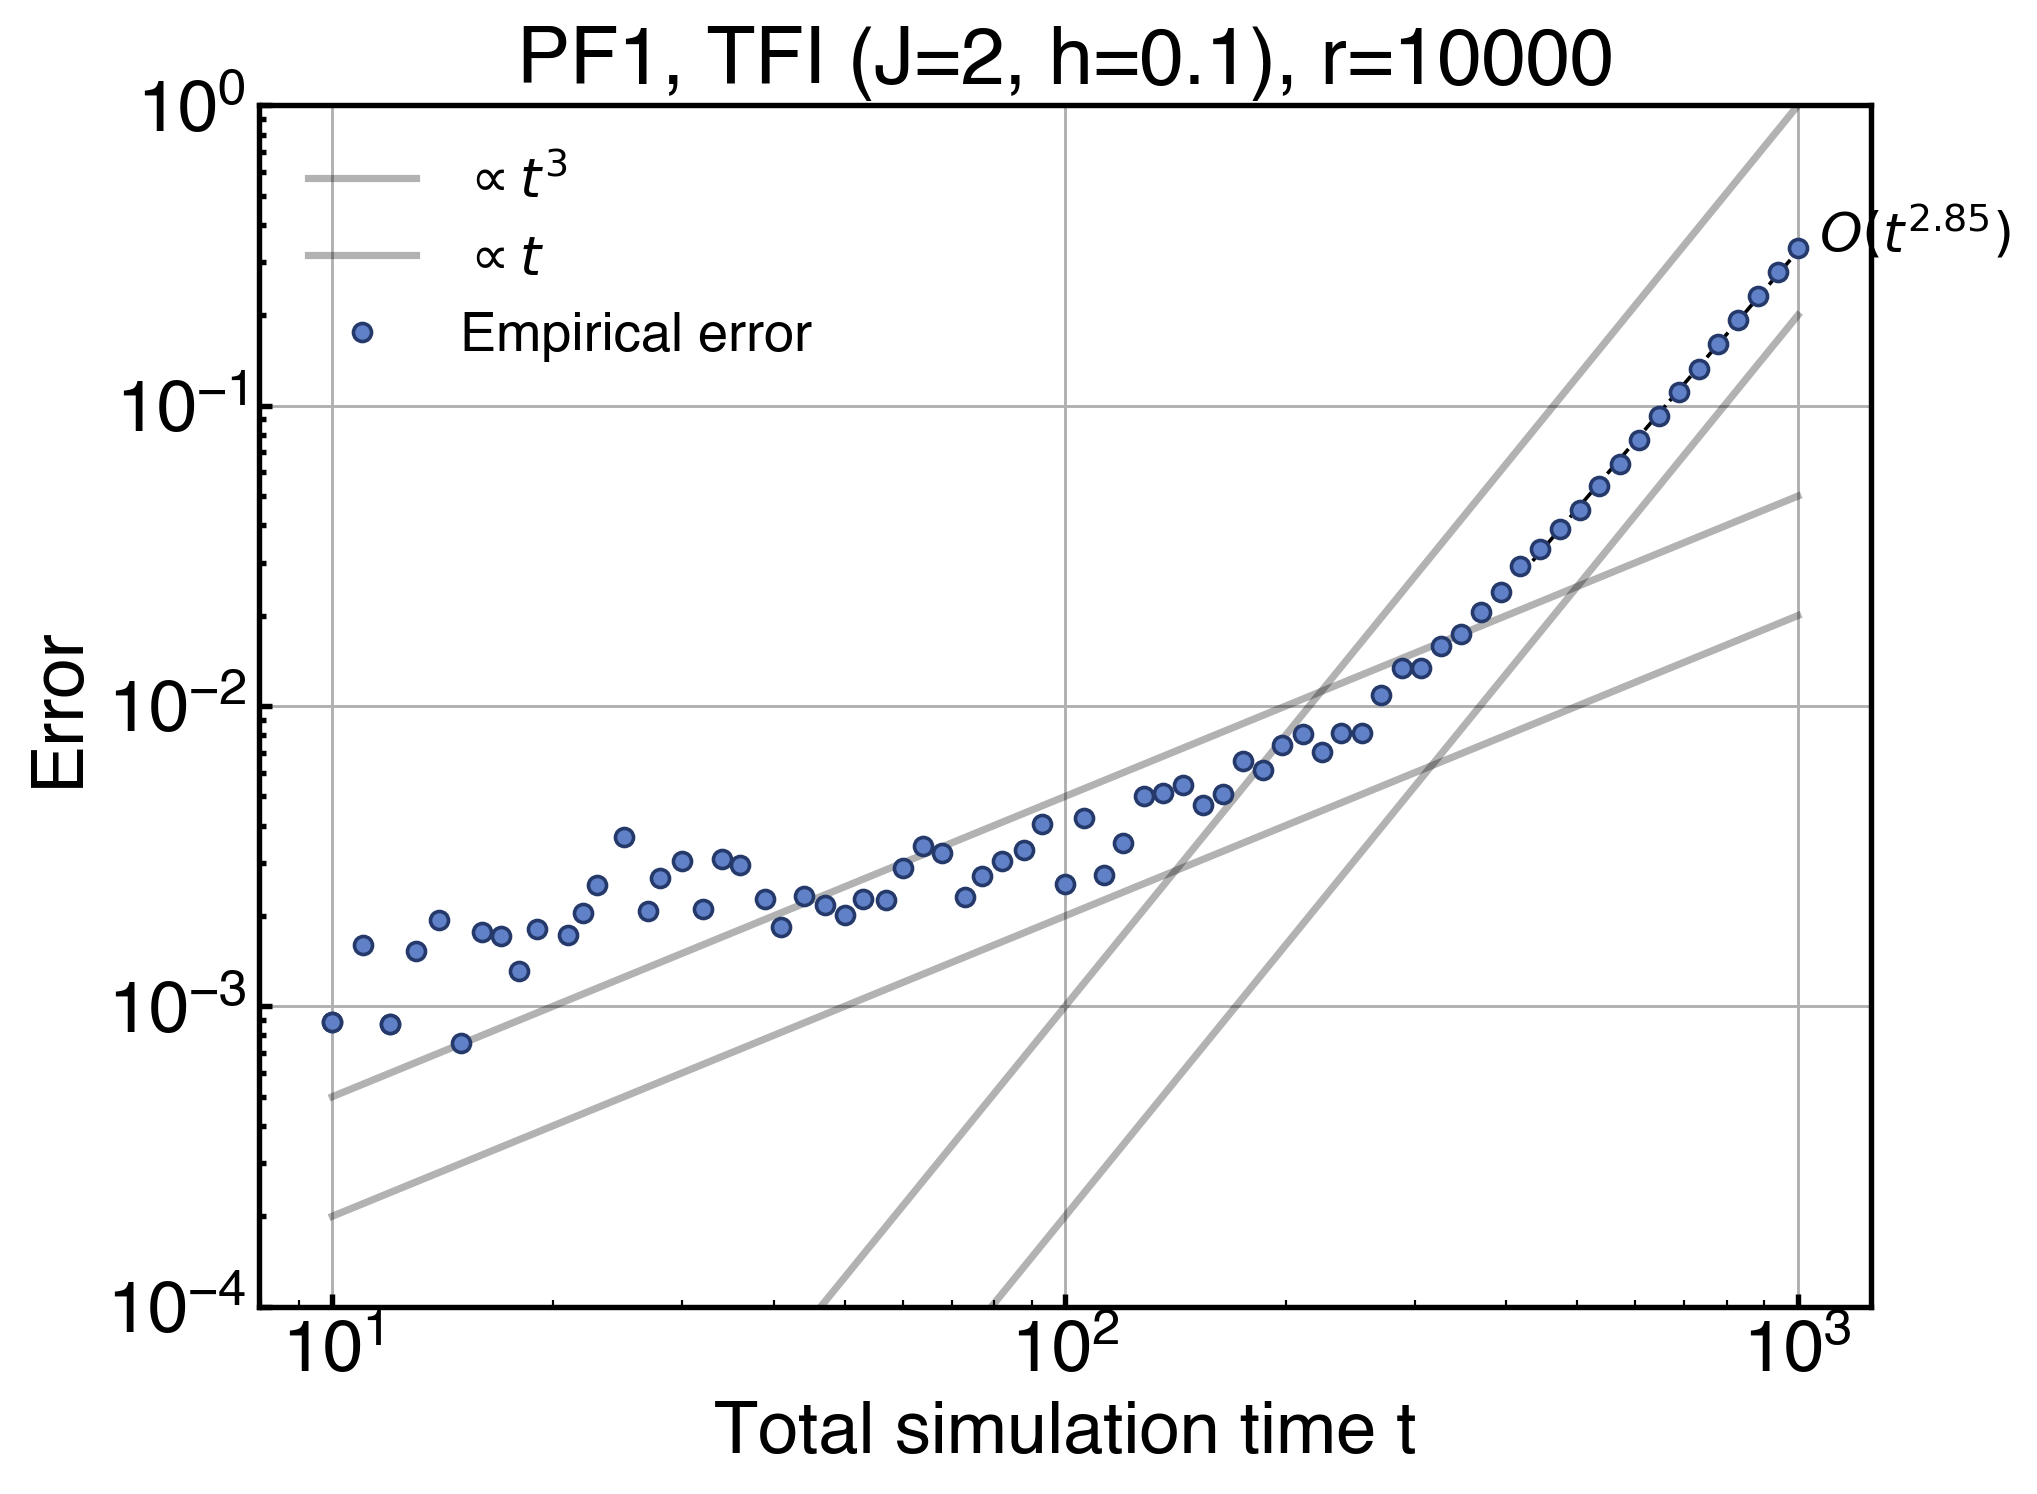

In [3]:
J=2; h=0.1; 
t_list = np.logspace(1, 3, 75, dtype=int)
print('t_list: ', t_list)
n = 6
err_list = []

r = 10000
for t in t_list:
    tfI = TF_Ising_1d(n, J, h)
    exact_U = expm(-1j * t * tfI.ham.to_matrix())
    appro_U_xyz = pf_r([h.to_matrix() for h in tfI.ham_xyz], t, r, order=1)
    # appro_U_xyz = standard_trotter([h.to_matrix(True) for h in tfI.ham_xyz], t, r, ord=1)
    err_list.append(norm(exact_U - appro_U_xyz, ord=2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# ax.hlines(1e-3, t_list[0], t_list[-1], 'k', '--')
# plot_fit(ax, t_list[:int(len(t_list)/2)], err_list[:int(len(t_list)/2)], var='t', offset=1.07, verbose=True)
plot_fit(ax, t_list[int(8*len(t_list)/10):], err_list[int(8*len(t_list)/10):], var='t', offset=1.07, verbose=True)

ax.plot(t_list, [t**3/1000000000 for t in t_list], 'k-', linewidth=2, alpha=0.3, label=fr'$\propto t^3$')
ax.plot(t_list, [t**3/5000000000 for t in t_list], 'k-', linewidth=2, alpha=0.3)
ax.plot(t_list, [t/20000 for t in t_list], 'k-', linewidth=2, alpha=0.3, label=fr'$\propto t$')
ax.plot(t_list, [t/50000 for t in t_list], 'k-', linewidth=2, alpha=0.3)
ax.plot(t_list, err_list, '.', label='Empirical error')
ax.set_xlabel('Total simulation time t')
ax.set_ylabel('Error')
ax.set_title(f'PF1, TFI (J={J}, h={h}), r={r}')
ax.loglog()
ax.set_ylim([1e-4, 1e-0])
ax.legend(); ax.grid()